In [69]:
import pickle as pkl
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [70]:
#f = open('collected_data_all_cpu.pkl', 'rb')
names = ['front-end', 'user', 'catalogue', 'orders', 'carts', 'payment', 'shipping']
metrics = ['ctn_latency', 'ctn_cpu', 'ctn_mem', 'ctn_write', 'ctn_read', 'ctn_net_in', 'ctn_net_out']
#metrics = ['ctn_cpu', 'ctn_mem', 'ctn_write', 'ctn_read', 'ctn_net_in', 'ctn_net_out']
idx = 3
f = open('./data_collected/memory-leak1_'+names[idx]+'.pkl', 'rb')
data = pkl.load(f)
data

,front-end_ctn_latency,front-end_ctn_cpu,front-end_ctn_mem,front-end_ctn_net_in,front-end_ctn_net_out,user_ctn_latency,user_ctn_cpu,user_ctn_write,user_ctn_net_in,user_ctn_net_out,...,carts_ctn_net_out,payment_ctn_latency,payment_ctn_cpu,payment_ctn_net_in,payment_ctn_net_out,shipping_ctn_latency,shipping_ctn_cpu,shipping_ctn_mem,shipping_ctn_net_in,shipping_ctn_net_out
0,0.000000,1.000000,0.657720,1.000000,1.000000,0.058093,1.000000,0.471765,0.981079,0.978965,...,1.000000,0.162099,0.994471,1.000000,1.000000,0.008548,0.492663,0.0,0.911122,0.882570
1,0.017990,0.985028,0.375233,1.000000,1.000000,0.000000,0.563044,0.488073,0.981079,0.978965,...,1.000000,0.183405,0.704644,1.000000,1.000000,0.020066,0.996092,0.0,0.985225,0.962042
2,0.073682,0.973441,0.413766,0.480414,0.450550,0.057654,0.930022,0.416125,1.000000,1.000000,...,0.950522,0.175658,1.000000,0.447896,0.406754,0.032583,1.000000,0.0,0.985225,0.962042
3,0.150836,0.973441,0.413766,0.885999,0.926857,0.191534,0.920819,0.416125,0.902045,0.903071,...,0.936012,0.368639,0.675846,0.894850,0.922096,0.009584,0.978790,0.0,1.000000,1.000000
4,0.185732,0.543334,0.201701,0.885999,0.926857,0.229331,0.844941,0.546673,0.902045,0.903071,...,0.936012,0.313498,0.904023,0.894850,0.922096,0.050059,0.946844,0.0,0.976205,0.992572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.887052,0.408775,0.512623,0.596795,0.658348,0.811795,0.544889,0.128072,0.596669,0.591773,...,0.693733,0.865909,0.501476,0.654761,0.704219,0.869769,0.575908,1.0,0.585688,0.653356
57,0.886897,0.764848,0.558597,0.596795,0.658348,0.822269,0.551085,0.140369,0.590627,0.585801,...,0.686480,0.907498,0.837438,0.645266,0.707000,0.875454,0.534167,1.0,0.585688,0.653356
58,0.934587,0.758906,0.555408,0.601459,0.644896,0.770532,0.547518,0.000000,0.590627,0.585801,...,0.686480,0.801288,0.837438,0.642210,0.706142,0.882662,0.521614,1.0,0.585688,0.653356
59,0.932751,0.747571,0.373638,0.599936,0.651227,0.773720,0.232998,0.358322,0.598951,0.592316,...,0.692168,0.759345,0.495194,0.642210,0.706142,0.102727,0.497797,1.0,0.099849,0.141847


In [71]:
data.columns

Index(['front-end_ctn_latency', 'front-end_ctn_cpu', 'front-end_ctn_mem',
       'front-end_ctn_net_in', 'front-end_ctn_net_out', 'user_ctn_latency',
       'user_ctn_cpu', 'user_ctn_write', 'user_ctn_net_in', 'user_ctn_net_out',
       'catalogue_ctn_latency', 'catalogue_ctn_cpu', 'catalogue_ctn_net_in',
       'catalogue_ctn_net_out', 'orders_ctn_latency', 'orders_ctn_cpu',
       'orders_ctn_mem', 'orders_ctn_write', 'orders_ctn_net_in',
       'orders_ctn_net_out', 'carts_ctn_latency', 'carts_ctn_cpu',
       'carts_ctn_write', 'carts_ctn_net_in', 'carts_ctn_net_out',
       'payment_ctn_latency', 'payment_ctn_cpu', 'payment_ctn_net_in',
       'payment_ctn_net_out', 'shipping_ctn_latency', 'shipping_ctn_cpu',
       'shipping_ctn_mem', 'shipping_ctn_net_in', 'shipping_ctn_net_out'],
      dtype='object')

In [72]:
name=[]
for i in metrics:
    n = names[idx]+'_'+i
    try:
        if len(data[[n]]) != 0 :
            name.append(n)
    except:
        print(n)        
service_metric = data[name]
service_metric

orders_ctn_read


,orders_ctn_latency,orders_ctn_cpu,orders_ctn_mem,orders_ctn_write,orders_ctn_net_in,orders_ctn_net_out
0,0.000000,0.000915,0.000000,0.633480,0.991138,0.981462
1,0.001462,0.000000,0.000135,0.691352,0.991234,1.000000
2,0.024797,0.048078,0.445068,0.691352,0.991234,1.000000
3,0.117606,0.052988,0.445068,0.566713,1.000000,0.994625
4,0.155707,0.204833,0.889951,0.535831,0.844273,0.850420
...,...,...,...,...,...,...
56,0.947948,0.999702,0.998308,0.135291,0.548645,0.530635
57,0.942711,0.998842,0.998917,0.759383,0.057124,0.028838
58,0.971075,0.998845,0.999848,0.759383,0.527630,0.519995
59,0.991221,0.916368,1.000000,0.759383,0.527630,0.519995


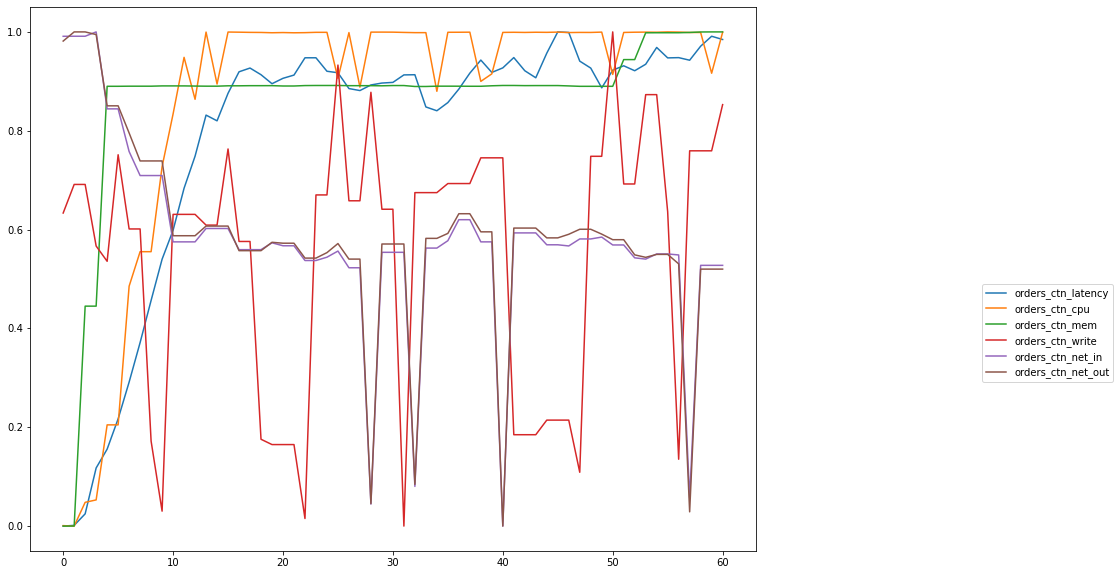

In [73]:
m = list(service_metric.columns)
plt.figure(figsize=(13,10))
for each in m:
    plt.plot(service_metric[each], label=str(each))
plt.legend(bbox_to_anchor=(1.5,0.5))
plt.show()

In [3109]:
X = service_metric

## PC

  0%|          | 0/5 [00:00<?, ?it/s]

PC result
[[ 0  0 -1  0  0]
 [ 0  0  0  0  0]
 [-1  0  0  0  0]
 [ 0  0  0  0 -1]
 [ 0  0  0 -1  0]]
[0, 2, 3, 4]
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


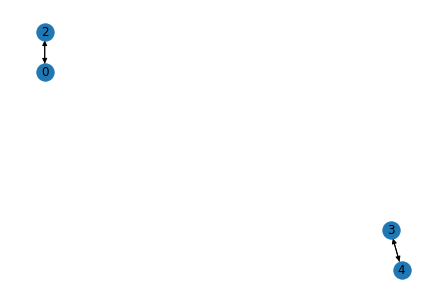

In [3110]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import chisq, fisherz, gsq, kci, mv_fisherz

cg = pc(X.to_numpy(), 0.05, fisherz, False, 0, -1)
adj = cg.G.graph

print('PC result')
print(adj)

# Change the adj to graph
G = nx.DiGraph()
for i in range(len(adj)):
    for j in range(len(adj)):
        if adj[i,j] == -1:
            G.add_edge(i,j)
        if adj[i,j] == 1:
            G.add_edge(j,i)
nodes = sorted(G.nodes())
print(nodes)
adj = np.asarray(nx.to_numpy_matrix(G, nodelist=nodes))
print(adj)
nx.draw(G, with_labels=True)

In [3111]:
# PageRank
from sknetwork.ranking import PageRank
pagerank = PageRank()
scores = pagerank.fit_transform(adj.T)
print(scores)
#cmap = plt.cm.coolwarm

score_dict = {}
for i,s in enumerate(scores):
    score_dict[i] = s
print(sorted(score_dict.items(), key=lambda item:item[1], reverse=True))

[0.25 0.25 0.25 0.25]
[(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]


## GES

x0
x1
x2
x3
x4
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  1]
 [ 0  0  0 -1  0]]
x0
x1
x2
x3
x4
x3
[[ 0  0  0  0  0]
 [ 0  0  0  0 -1]
 [ 0  0  0  0  0]
 [ 0  0  0  0 -1]
 [ 0  1  0 -1  0]]
x0
x1
x2
x3
x4
x3
[[ 0  0  0 -1  0]
 [ 0  0  0  0 -1]
 [ 0  0  0  0  0]
 [ 1  0  0  0 -1]
 [ 0 -1  0 -1  0]]
x0
x1
x2
x3
x4
x1
[[ 0  0  0 -1  0]
 [ 0  0  0  0 -1]
 [ 0  0  0  0  1]
 [-1  0  0  0 -1]
 [ 0 -1 -1 -1  0]]
x0
x1
x2
x3
x4
x0
x1
x2
x3
x0
[[ 0  0  0 -1  1]
 [ 0  0  0  0 -1]
 [ 0  0  0  0 -1]
 [-1  0  0  0 -1]
 [-1 -1 -1 -1  0]]
x0
x1
x2
x3
x4
x0
x1
x2
x3
x0
[[ 0  1  0 -1 -1]
 [-1  0  0  0 -1]
 [ 0  0  0  0 -1]
 [-1  0  0  0 -1]
 [-1 -1 -1 -1  0]]
x0
x1
x2
x3
x4
x0
x2
x3
x4
x2
x3
backward
[[ 0 -1  0 -1  0]
 [ 1  0  0  0  1]
 [ 0  0  0  0 -1]
 [-1  0  0  0 -1]
 [ 0 -1 -1 -1  0]]
x0
x1
x2
x3
x4
x0
x1
x2
[[ 0  0  0 -1  0]
 [ 0  0  0  0  1]
 [ 0  0  0  0 -1]
 [-1  0  0  0 -1]
 [ 0 -1 -1 -1  0]]
x0
x1
x2
x3
x4
x0
x1
x2
x3
x0
[0, 1, 2, 3, 4]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0.

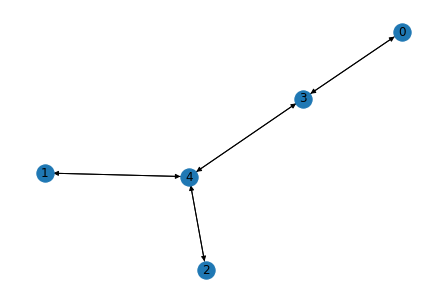

In [3112]:
from causallearn.search.ScoreBased.GES import ges

#X = data.iloc[:,1:]
X = X - np.tile(np.mean(X, axis=0), (X.shape[0], 1))
X = np.dot(X, np.diag(1 / np.std(X, axis=0)))
maxP = 5  # maximum number of parents when searching the graph
parameters = {'kfold': 10, 'lambda': 0.01}
#X = X[:50, :]
Record = ges(X, 'local_score_CV_general', maxP=maxP, parameters=parameters)
adj = Record['G'].graph

# Change the adj to graph 
G = nx.DiGraph()
for i in range(len(adj)):
    for j in range(len(adj)):
        if adj[i,j] == -1:
            G.add_edge(i,j)
        if adj[i,j] == 1:
            G.add_edge(j,i)
nodes = sorted(G.nodes())
print(nodes)
adj = np.asarray(nx.to_numpy_matrix(G, nodelist=nodes))
print(adj)
nx.draw(G, with_labels=True)

In [3113]:
# PageRank
from sknetwork.ranking import PageRank
pagerank = PageRank()
scores = pagerank.fit_transform(adj.T)
print(scores)
#cmap = plt.cm.coolwarm

score_dict = {}
for i,s in enumerate(scores):
    score_dict[i] = s
print(sorted(score_dict.items(), key=lambda item:item[1], reverse=True))

[0.12988314 0.13586787 0.13586787 0.25446353 0.34391759]
[(4, 0.3439175925336885), (3, 0.25446353356271056), (1, 0.13586786801267792), (2, 0.13586786801267792), (0, 0.12988313787824513)]


## ICA-LINGAM

In [3114]:
from causallearn.search.FCMBased import lingam
#model = lingam.DirectLiNGAM()
model = lingam.ICALiNGAM()
model.fit(X)

print('LiNGAM result')
print(model.causal_order_) # the later virable is unable to cause the former virable
#print(model.adjacency_matrix_)

# Acutal matrix: row points to col 
adj = model.adjacency_matrix_.T 
# For PageRank, should adj.T
print(adj)

LiNGAM result
[3, 1, 4, 0, 2]
[[ 0.          0.         -0.74358624  0.          0.        ]
 [-0.46071425  0.         -0.62678378  0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-0.47618622  0.99450923 -0.92301354  0.          0.99990184]
 [ 0.          0.          0.          0.          0.        ]]


In [ ]:
org_G = nx.from_numpy_matrix(adj, parallel_edges=True, create_using=nx.DiGraph)
pos=nx.circular_layout(org_G)
nx.draw(org_G, pos=pos, with_labels=True)

In [ ]:
# PageRank
from sknetwork.ranking import PageRank
pagerank = PageRank()
scores = pagerank.fit_transform(np.abs(adj.T))
print(scores)
#cmap = plt.cm.coolwarm

score_dict = {}
for i,s in enumerate(scores):
    score_dict[i] = s
print(sorted(score_dict.items(), key=lambda item:item[1], reverse=True))